<a href="https://colab.research.google.com/github/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/1_MakeABasicMap_CFediting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

First things first, if you haven't already done so: You need your own copy of this notebook.Once in Colab,go to "File" and  'save a copy in github' (give access if needed.... put it into the repository you made for this course).

Now you have your own copy of the notebook. Click 'open in colab' to get started working on the practical exercise. 

* Recap:    
 * [GitHub](https://github.com/) is widely known as one of the most famous version control repositories. This is where these notebooks practicals will be saved and accessed publicly.
 * [Colab](https://colab.research.google.com) is working platform enabling the creation of machine learning model or in other word the application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Colab platform is provided by Google and allow Jupyter notebook environment to be populated where you can use free GPUs (Graphics Processing Unit just like a plug-in within to renders images, animations and video for instance) and TPUs (Tensor Processing Unit).
 * [Jupyter notebook](https://jupyter.org) are web applications that you will be used for the next practical classes which ease the creation and sharing of documents containing live code. You can explore a [gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) of interesting Jupyter notebooks and read why Jupyter is ‘data scientists’ computational notebook of choice ([i](https://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)and [ii](https://www.nature.com/articles/d41586-018-07196-1)).
 


---


# What's a notebook and how does it work?
The layout of these notebooks is simplified compared to most web application ‘architecture’ and have two types of cells: 

* Text cells which are explanatory and that I will be using - a lot- to explain things to you.  These cells can be easily edited in a language called  [Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

* Code cells which we will use to do things. They  are executable code, mostly written in programming [language](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html#Code-cells-allow-you-to-enter-and-run-code). These code cells are commonly using a language called [python](https://www.python.org/) or [R](https://www.r-project.org/)). In this course we'll mostly be using python. As you know, stereotypically archaeologists hate snakes. Python is the exception to this. 

You can add text or code cells to your version of the notebook. To make things happen in a code cell you can click on the cell and then type 'ctrl + enter' or push the play button that will appear on the left.



---

 



# What we are doing
In this practical exercise, you will make some basic maps. You're making them in something called a notebook. To get started, we will get the tools we need. These tools are from open source library from Python that allows powerful data visualisation. This is in fact the first bit of python code you are using! 

We will always start a practical exercise in a notebook  like this.

In [20]:
import folium
import branca
import pandas as pd
print(folium.__file__)
print(folium.__version__)

/usr/local/lib/python3.6/dist-packages/folium/__init__.py
0.8.3


# To make a map we need to get some data. 
This data must be explicitly spatial - that is have spatial coordinates that tell us about locations in a way that machines can understand. 

Spatial coordinates are pairs of numbers organised on a x-horizontal and y-vertical axis – this is the bit of geometry you will be using the most as an archaeologist! Coordinates (x,y) can be called eastings or northings or latitude and longitudes depending on the type projection used to transform the map (refer to your First Course Meeting notes). The most common coordinate format for maps on the internet are [latitude and longitude coordinates](https://www.latlong.net/). 


In this notebook, we'll experiment with the spatial data from:

 Palmisano, A., Bevan, A. and Shennan, S., 2018. Regional Demographic Trends and Settlement Patterns in Central Italy: Archaeological Sites and Radiocarbon Dates. **Journal of Open Archaeology Data**, 6(1), p.2. DOI: [http://doi.org/10.5334/joad.43](http://doi.org/10.5334/joad.43)
 
 (Which you should have read about before class!)
 

---


These nice people provided the data behind their analysis so we can re-use it. I converted their old school shapefile to a CSV for you to make things easier. If you ever have to do this yourself, there are lots of online converters like [this one](https://mygeodata.cloud/converter/shp-to-csv). 

Later in the course, you will also learn to read data from shapefiles directly into your notebook. This is a little more complicated, so we are skipping it for now.

* Reminder: 
a shapefile is a vector data storage file format that can be used in spatial software such as [Q-GIS](https://www.qgis.org/en/site/) (refer to your First Course Meeting notes). A CSV file is simple tabular file format using commas or space to distinguish elements within it.


In [21]:
#Get the data by reading it into the notebook
palmisano_tuscany_sites = pd.read_csv("https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/site_centriods_tuscany.txt")

palmisano_tuscany_sites.head()

,OBJECTID,Id,Toponyms,Type,Period,StartDate,EndDate,Longitude,Latitude,LocQual,SizeHa,SizeQual,Source,Source_id,ORIG_FID
0,1,1,Padiglione,settlement,Iron Age,-800,-700,12.639324,41.515316,A,0.2,E,"Attema et al. 2010, p. 229",15114,0
1,2,1,Padiglione,settlement,Republican Period,-100,-30,12.636817,41.516111,A,0.2,E,"Attema et al. 2010, p. 229",15114,1
2,3,1,Padiglione,settlement,Imperial Period,-30,400,12.636793,41.516111,A,0.2,E,"Attema et al. 2010, p. 229",15114,2
3,4,1,Padiglione,settlement,Late Antique/Early Medieval,400,500,12.636817,41.516111,A,0.2,E,"Attema et al. 2010, p. 229",15114,3
4,5,2,Astura,settlement,Iron Age,-700,-600,12.769313,41.417720,A,34.0,D,"Attema et al. 2010, p. 186; Picarreta 1977, p.21",11201,4


#learning a new language – decomposing the code

in the code cell 21 above, we have a simple piece of code which allows you to open the CSV file containing the archaeological sites information. 


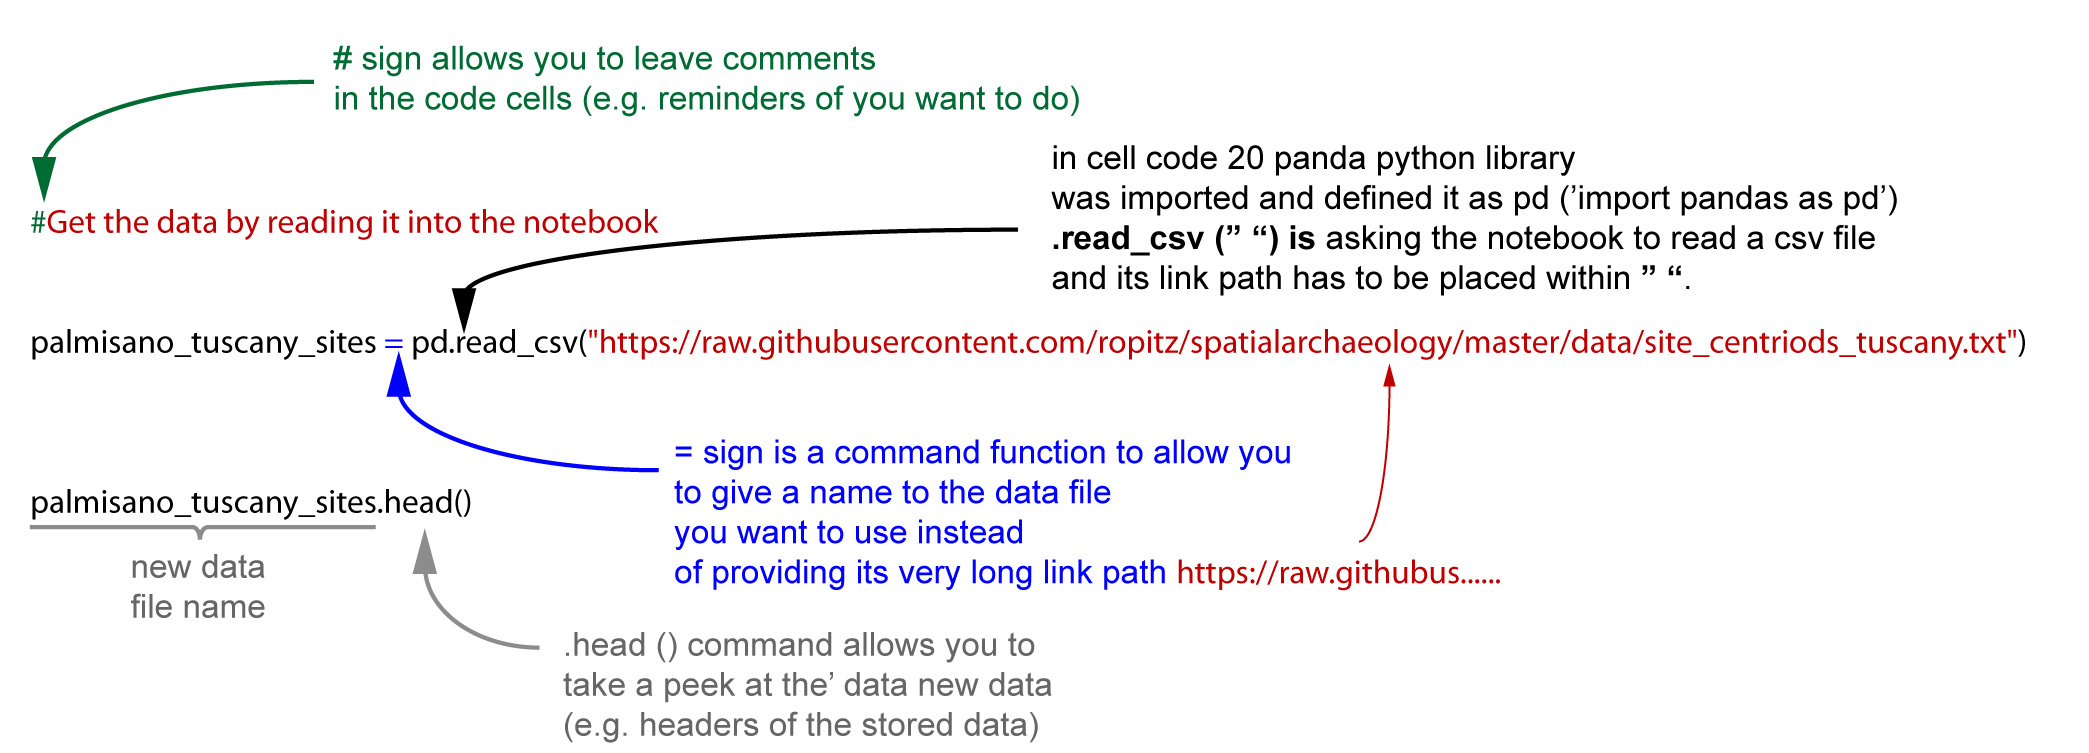

In [30]:
Image('2-make a map (1).jpg', width =1200)

# Maps should answer questions

We've discussed how to come up with a good, explicitly spatial question. We've also discussed how to design a good map. Here you're going to start putting all this into practice.

The data in this article provides information about settlement and population patterns in central Italy and how they change over time. Where people were living and working at various times in the past is a basic archaeological question.

Let's say your question is about how many iron age sites are present in the region, and what their distribution is like in space - that is where they are located and how many relatively speaking are in each area. How would you go about answering this question with a map?

# Start by filtering your big dataset to get only the data you need

The original data file contains over 10970 entries for all archaeological settlement in Central Italy. So you need to filter your big data file to get just the iron age sites.


In [22]:
#tell the notebook you only want to see stuff where the period is the iron age.
palmisano_tuscany_sites_iron_age = palmisano_tuscany_sites[(palmisano_tuscany_sites['Period']=="Iron Age") ]

palmisano_tuscany_sites_iron_age.head()

,OBJECTID,Id,Toponyms,Type,Period,StartDate,EndDate,Longitude,Latitude,LocQual,SizeHa,SizeQual,Source,Source_id,ORIG_FID
0,1,1,Padiglione,settlement,Iron Age,-800,-700,12.639324,41.515316,A,0.20,E,"Attema et al. 2010, p. 229",15114,0
4,5,2,Astura,settlement,Iron Age,-700,-600,12.769313,41.417720,A,34.00,D,"Attema et al. 2010, p. 186; Picarreta 1977, p.21",11201,4
96,97,65,Piscina della Farna,settlement,Iron Age,-700,-600,12.726173,41.482471,A,0.04,E,Attema et al. 2010,11284,96
104,105,70,Cadolino,settlement,Iron Age,-800,-700,12.662566,41.492596,A,1.00,E,Attema et al. 2010,15003,104
133,134,81,Pineta della Campana,settlement,Iron Age,-700,-600,12.670644,41.513748,A,0.08,E,Attema et al. 2010,15029,133


#learning a new language – decomposing the code

In the code cell above, we have a simple piece of code which allows you to open the CSV file containing the archaeological sites information. 


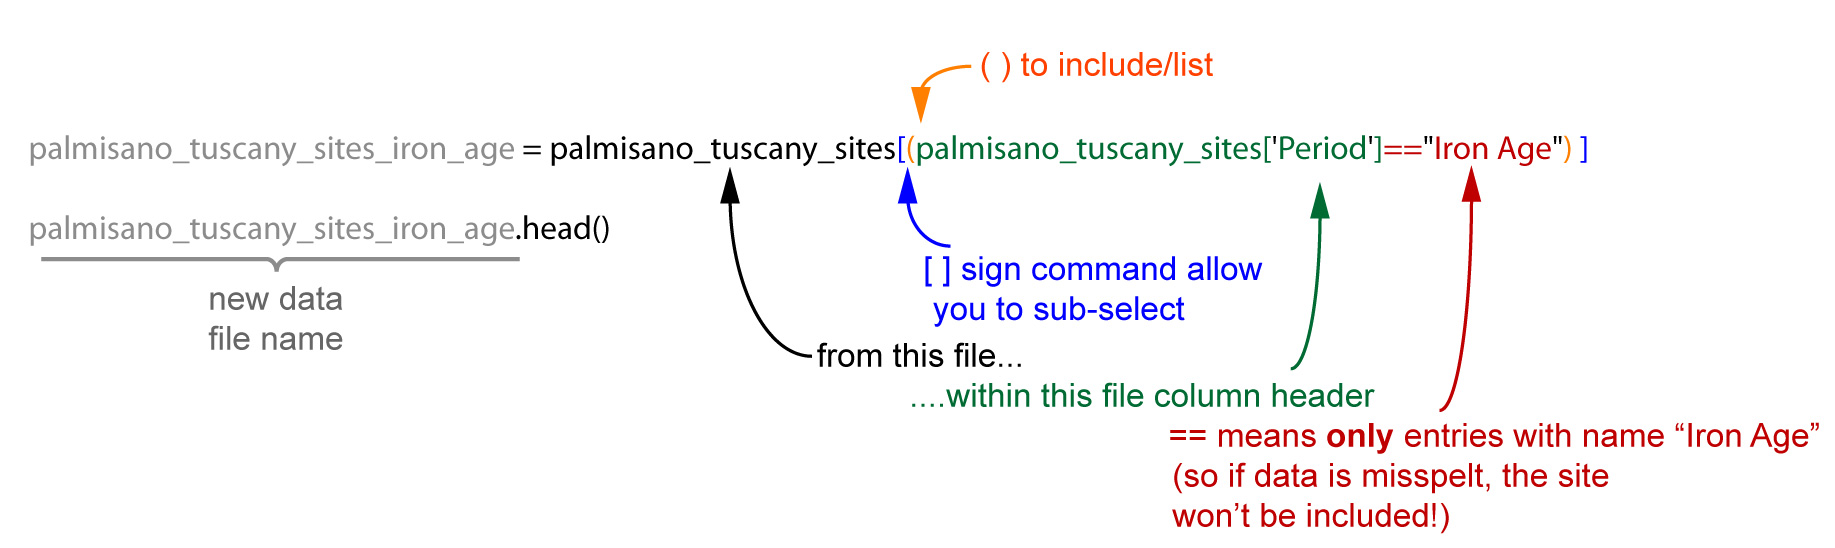

In [23]:
Image('3-make a map.jpg', width =1200)

# Put the data onto a map
Now we want to add this data to a simple map. 

You need to start by getting the coordinates of all the points so you can center the map - that is focus on the area where your data is. Probably it will be a good idea to put the middle of your map roughly where the middle of your dataset is located. 

Think about it... if your data is in Italy, putting Antarctica as the center of your map is not going to be very effective.

![Antarctica is not where the map should be](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Antarctica_6400px_from_Blue_Marble.jpg/310px-Antarctica_6400px_from_Blue_Marble.jpg)


Now, you want to add a marker for each Iron Age site. A marker, recall, is a graphic icon to represent the coordinates where a site is centred. The libraries you imported in Cell 20 will allow you to visualise:
* centre your map
* zoom level of your map (world, country, region or street level)
* the marker/location 



In [34]:
#location is the mean of every lat and long point to centre the map.
location = palmisano_tuscany_sites_iron_age['Latitude'].mean(), palmisano_tuscany_sites_iron_age['Longitude'].mean()

#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=10)

#Each location in the DataFrame is then added as a marker to the basemap points are then added to the map
for i in range(0,len(palmisano_tuscany_sites_iron_age)):
    folium.Marker([palmisano_tuscany_sites_iron_age['Latitude'].iloc[i],palmisano_tuscany_sites_iron_age['Longitude'].iloc[i]]).add_to(m)
        
m


# Yay! 

You have a map. Now, a design question: what is a good starting zoom level?

Do you want your map zoomed further out or further in given the extent of your data? In the code cell above, play around with the 'zoom_start' parameter and find a good zoom level that makes you happy.


---

# You just did something new

Rather than just executing code by pushing play, you've edited the code by changing a variable. 

Easy, right?

This is where many people get started with scripting in archaeology. You find a bit of [open source code](https://opensource.com/resources/what-open-source) that seems to do what you need, and then you modify it. There's no sense in writing code from scratch when there's lots of useful open source code available that is meant to be shared and modified.



# Representing information and relative values or quantities with graphics

Now let's look at how to represent larger and smaller sites. The archaeologists in this project have a qualitative ranking of site size from large (A) to small (F). 

You can see the categories they've used, and that there are more small sites than larger ones. 

Say you want to make the two categories of sites that are the largest different colours. Why do this? Maybe larger sites have more people, so this provides insights into demographics.



In [0]:
#Size surely matters... group the sites by size category and get the number of sites in each size category. 

# SizeQual is the name of the 'attribute', or column in the table, that has information on site size. 
# An attribute is anything attached to spatial data other than the coordinates

palmisano_tuscany_sites_iron_age['SizeQual'].value_counts()

In the step above, you've set up your new dataset. It's what we would call a 'subset' of your original data.

Now you are ready to make a new map.

In [0]:
#now make a map just like you did before. Note that this time we're adding a scale bar with 'control_scale'
location = palmisano_tuscany_sites_iron_age['Latitude'].mean(), palmisano_tuscany_sites_iron_age['Longitude'].mean()
m = folium.Map(location=location,zoom_start=10,control_scale = True)

#Assign different colours to the two large site categories - B and C in this case
for i in range(0,len(palmisano_tuscany_sites_iron_age)):


    site_size = palmisano_tuscany_sites_iron_age['SizeQual'].iloc[i]
    if site_size == 'C':
        color = 'blue'
    elif site_size == 'B':
        color = 'green'
    else:
        color = 'red'
    
# add the markers to the map, using the locations and colours    
    folium.Marker([palmisano_tuscany_sites_iron_age['Latitude'].iloc[i],palmisano_tuscany_sites_iron_age['Longitude'].iloc[i]],icon=folium.Icon(color=color)).add_to(m)

m

# Designing your map - Symbology

Now, go back into the cell above and experiment a bit. Try out some different colours. Do certain combinations work well? Try adding different colours for each of the smaller categories of sites. Does that make the map clearer or more confusing?

## What symbol scheme is best for your map?

Maybe it makes more sense to show size by changing the size of the icon than the colour. Let's make another map that varies the size of the icon for each site based on its size in hectares.

In [0]:
#now make a map just like you did before. 
location = palmisano_tuscany_sites_iron_age['Latitude'].mean(), palmisano_tuscany_sites_iron_age['Longitude'].mean()
m = folium.Map(location=location,zoom_start=8,control_scale = True)


# Set the size for each circle icon by defining the 'radius' which is the radius of the circle
# Here we are multiplying the size in hectares (the SizeHa attribute) by 15. Try different values here to get icons a size you like
for i in range(0,len(palmisano_tuscany_sites_iron_age)):
   folium.Circle(
      location=[palmisano_tuscany_sites_iron_age['Latitude'].iloc[i],palmisano_tuscany_sites_iron_age['Longitude'].iloc[i]],
      popup=palmisano_tuscany_sites_iron_age.iloc[i]['Toponyms'],
      radius=palmisano_tuscany_sites_iron_age.iloc[i]['SizeHa']*15, #this is where we set the value of 15 - change this variable to get differrent size icons
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
    
m

# thinking about spatial density or 'clustering' or conceptration

Now what if you want to make a map that shows the concentration of sites in the iron age, that is areas with more and fewer sites? 


This kind of map is often called a 'heatmap'. Essentially it shows areas with more sites as 'hotter' (generally red in colour) and areas with fewer sites as cooler.


In this kind of map surely larger sites should count more - we call this 'weighting'. The general idea is that a site that is twice as large should count for twice as much in our heatmap.


In [0]:
#first make a list of the coordinates of each site and its size in hectares, which we will use for the size-based weighting
data_heat = palmisano_tuscany_sites_iron_age[['Latitude','Longitude','SizeHa']].values.tolist()

In [0]:
#look at the first line of your list to check it seems to have worked
data_heat[0]

In [0]:
#to make the heatmap, we need to get an extra tool, so...
import folium.plugins as plugins



In [0]:
# now make a map a bit like you did before, set your zoom level and your centre location. Then use the plugin to make the heatmap. 

m = folium.Map(location=location, zoom_start=10)
#tiles='stamentoner'

plugins.HeatMap(data_heat).add_to(m)

#type 'm' for map (the variable you set above) to tell the notebook to display your map
m

# Success!

You should have a heatmap showing the concentrations of Iron Age sites in the region.

You could repeat the exercise with sites from any period in which you are interested.

Hopefully you've learned to make some basic maps and are starting to understand how to put into practice some of the theory of map design and spatial visualisation we've been discussing.

That's it for today... Remember to save your notebook (under a new name) so you can come back to it and practice making basic static maps. 

